In [1]:
import deepSI
from NonlinearController.systems import MassSpringDamper
import numpy as np
import matplotlib.pyplot as plt
from NonlinearController.utils import randomLevelReference

In [2]:
k=1e4; c=5; m=0.25
wn = np.sqrt(k/m)
zeta = c/(2*m*wn)
Q = 1/(2*zeta)
wn, zeta, Q

(200.0, 0.05, 10.0)

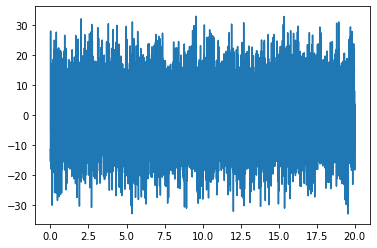

In [3]:
dt = 0.002; sim_len = 10000; sigma_n = [8e-5]
sim_times = np.arange(sim_len)*dt

setup = MassSpringDamper(k=k, c=c, m=m, dt=dt, sigma_n=sigma_n)

u = deepSI.deepSI.exp_design.multisine(sim_len, pmax=sim_len//2-1, n_crest_factor_optim=20)*10
# u = randomLevelReference(sim_len, [1,10], [-25,25])
# u = np.zeros(sim_len); u[10] = 10
# u = np.sin(np.arange(sim_len)*dt*wn)
# u = np.hstack(np.ones(sim_len))*1
data = setup.apply_experiment(deepSI.System_data(u=u))
plt.plot(sim_times, u)

In [4]:
S = np.sum(np.square(data.y[:]))/sim_len
N = np.sum(np.square(np.random.normal(0, sigma_n[0], sim_len)))/sim_len
S/N

310.93597998226784

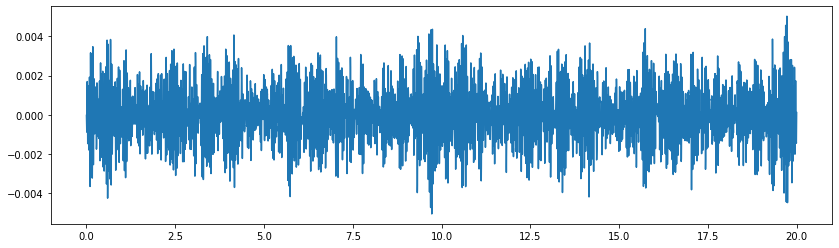

In [5]:
fig1 = plt.figure(figsize=[14, 4])
plt.plot(sim_times, data.y[:])

In [7]:
model = deepSI.load_system('NonlinearController/trained_models/MSD/msd_test_8')

data = setup.apply_experiment(deepSI.System_data(u=u))
test_ss_enc = model.apply_experiment(data)

NRMS simulation SS linear  6.04%


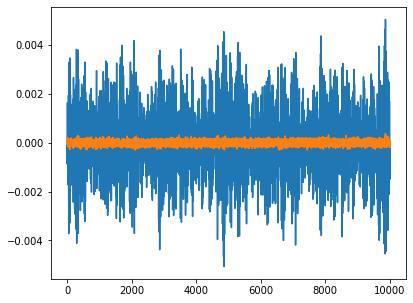

In [8]:
print(f'NRMS simulation SS linear  {test_ss_enc.NRMS(data):.2%}')
plt_len = sim_len

fig1 = plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(test_ss_enc.y[:plt_len], label="System")
plt.plot(test_ss_enc.y[:plt_len] - data.y[:plt_len], label='Error')